In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
N = 20              # training samples
poly_order = 10      # polynomial order
M = 100             # testing samples

In [168]:
# Generate equispaced floats in the interval [0, 2*pi]
x_train = np.linspace(0, 2*np.pi, N)
# Generate noise
mean = 0
std = 0.05
# Generate some numbers from the sine function
y = np.sin(x_train)
# Add noise
y += np.random.normal(mean, std, N)
#defining it as a matrix
y_train = np.asmatrix(y.reshape(N,1))

# adding the bias and higher order terms to x

In [175]:
x = np.append(np.ones((N,1)),x_train.reshape((N,1)),axis = 1)
for i in range(0,poly_order-1):
	x = np.append(x,(x_train.reshape((N,1)))**(i+2),axis = 1)
x = np.asmatrix(x)
print(x.shape)
# print(x)

(20, 11)


# finding the optimum weights

In [170]:
w = (x.T*x).I*x.T*y_train
print(w)

[[-6.38080034e-02]
 [ 2.61354820e+00]
 [-6.85966457e+00]
 [ 1.17597977e+01]
 [-1.08833485e+01]
 [ 5.83551909e+00]
 [-1.93037154e+00]
 [ 4.00929121e-01]
 [-5.09489913e-02]
 [ 3.62070155e-03]
 [-1.10241772e-04]]


# finding the 1/beta(variance)

In [171]:
y_train_predict = x*w
variance = (np.linalg.norm(y_train - y_train_predict)**2)/N
print(variance)

0.0004200252733318746


# generating test samples

In [172]:
M = 100
x_test = np.linspace(0, 2*np.pi, M)
x_testing = np.asmatrix(np.append(np.ones((M,1)),x_test.reshape(M,1),axis = 1))
for i in range(0,poly_order-1):
	x_testing = np.append(x_testing,(x_test.reshape((M,1)))**(i+2),axis = 1)
x_testing = np.asmatrix(x_testing)

# predicting the outputs for the test sample

In [173]:
y_test = x_testing*w
y_test_normal = y_test + np.random.normal(0,np.sqrt(variance),(M,1))

# ploting the results

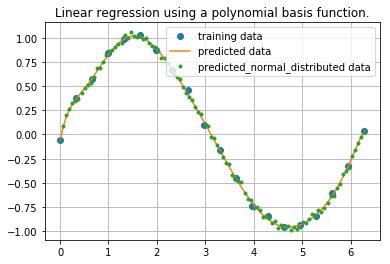

In [174]:
plt.plot(x_train,y_train,'o',label = 'training data')
plt.plot(x_test,y_test,label = 'predicted data')
plt.plot(x_test,y_test_normal,'.',label = 'predicted_normal_distributed data')
plt.legend()
plt.grid()
plt.title("Linear regression using a polynomial basis function.")
plt.show()

# Observations

- The label following a distribution is taken into account and the model is trained accordingly
- Weights are estimated by maximum likelyhood of Y
- variance of the labels is minimized and Normal distribution has been fit to the predicted lables, which gave pretty good fit 